In [1]:
from analyst import Analyst
from config import ModelConfig, TrainerConfig
from dataset import load_dataset_manager

import torch.nn.functional as F

In [2]:
trainer_config = TrainerConfig(
    dataset_name="toydata-simple", epochs=1, ignore_saved_model=True, load_model=False, batch_size=64
)
model_config = ModelConfig(d_model=32, lr=0.005)

In [3]:
trainer_config

TrainerConfig(model_name='attentive2', dataset_name='toydata-simple', epochs=1, batch_size=64, verbose=False, ignore_saved_model=True, load_model=False, save_model=True, load_dataset=True, save_dataset=True, cache_dir='cache/', dataset_dir='cache/dataset/')

In [4]:
model_config

ModelConfig(d_model=32, max_embedding_norm=None, window_size=8, negative_sample_size=5, lr=0.005, use_learnable_embedding=True, dropout=0.1, add_seq_embedding=False, add_positional_encoding=False)

In [5]:
dataset_manager = load_dataset_manager(
    dataset_name=trainer_config.dataset_name,
    dataset_dir=trainer_config.dataset_dir,
    load_dataset=trainer_config.load_dataset,
    save_dataset=trainer_config.save_dataset,
)

load cached dataset_manager from: cache/dataset/toydata-simple.pickle


In [6]:
analyst = Analyst(
    dataset_manager=dataset_manager,
    trainer_config=trainer_config,
    model_config=model_config,
)

In [7]:
analyst.fit(show_fig=False)

train start


100%|██████████| 1688/1688 [00:02<00:00, 773.07it/s]


Epoch: 1, loss: 0.17991196081545582, test_loss: {'test': 0.35196703471137447}
saved best model to cache/best-toydata-simple-attentive2.pt
train end
saved model to cache/toydata-simple-attentive2.pt


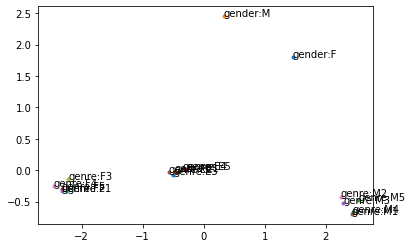

In [21]:
analyst.visualize_meta_embedding("gender", "genre", method="pca")

In [22]:
analyst.similarity_between_seq_meta_and_item_meta(
    "gender", "M", "genre", method="inner-product", num_top_values=30
)
analyst.similarity_between_seq_meta_and_item_meta(
    "gender", "F", "genre", method="inner-product", num_top_values=30
)

similarity of seq meta: gender:M for meta: genre
7.6639 F5
7.4850 F4
7.2118 F2
7.0117 F1
6.9749 F3
4.2717 E1
4.0152 E4
3.9590 E3
3.8381 E2
3.7357 E5
1.4192 M2
1.0667 M3
1.0064 M4
0.9594 M5
0.8762 M1
similarity of seq meta: gender:F for meta: genre
0.6212 E4
0.5960 E5
0.4354 F4
0.4220 F3
0.3599 F2
0.2722 F5
0.2720 E3
0.1749 E2
0.1441 F1
0.0314 E1
-1.0243 M5
-1.1068 M2
-1.1142 M1
-1.2714 M4
-1.2983 M3


In [10]:
dataset_manager.item_meta_le.classes_

array(['genre:E1', 'genre:E2', 'genre:E3', 'genre:E4', 'genre:E5',
       'genre:F1', 'genre:F2', 'genre:F3', 'genre:F4', 'genre:F5',
       'genre:M1', 'genre:M2', 'genre:M3', 'genre:M4', 'genre:M5'],
      dtype='<U8')

In [11]:
dataset_manager.seq_meta_le.classes_

array(['gender:F', 'gender:M'], dtype='<U8')

In [34]:
for i in range(10):
    print(analyst.trainer.model.embedding_seq.weight[i].norm())

tensor(3.5177, grad_fn=<CopyBackwards>)
tensor(3.1228, grad_fn=<CopyBackwards>)
tensor(3.4387, grad_fn=<CopyBackwards>)
tensor(3.0420, grad_fn=<CopyBackwards>)
tensor(3.6859, grad_fn=<CopyBackwards>)
tensor(3.6259, grad_fn=<CopyBackwards>)
tensor(2.7294, grad_fn=<CopyBackwards>)
tensor(2.5215, grad_fn=<CopyBackwards>)
tensor(3.0481, grad_fn=<CopyBackwards>)
tensor(2.9895, grad_fn=<CopyBackwards>)


In [35]:
for i in range(10):
    print(analyst.trainer.model.embedding_item.weight[i].norm())

tensor(6.0872, grad_fn=<CopyBackwards>)
tensor(6.0978, grad_fn=<CopyBackwards>)
tensor(4.7153, grad_fn=<CopyBackwards>)
tensor(5.2141, grad_fn=<CopyBackwards>)
tensor(5.1377, grad_fn=<CopyBackwards>)
tensor(5.7213, grad_fn=<CopyBackwards>)
tensor(5.2527, grad_fn=<CopyBackwards>)
tensor(6.5006, grad_fn=<CopyBackwards>)
tensor(5.6484, grad_fn=<CopyBackwards>)
tensor(5.3071, grad_fn=<CopyBackwards>)


In [25]:
for i in range(2):
    print(analyst.trainer.model.embedding_seq_meta.weight[i].norm())

tensor(2.3168, grad_fn=<CopyBackwards>)
tensor(2.7873, grad_fn=<CopyBackwards>)


In [26]:
for i in range(15):
    print(analyst.trainer.model.embedding_item_meta.weight[i].norm())

tensor(1.9411, grad_fn=<CopyBackwards>)
tensor(2.0628, grad_fn=<CopyBackwards>)
tensor(1.9910, grad_fn=<CopyBackwards>)
tensor(1.8787, grad_fn=<CopyBackwards>)
tensor(1.8540, grad_fn=<CopyBackwards>)
tensor(3.7015, grad_fn=<CopyBackwards>)
tensor(3.7621, grad_fn=<CopyBackwards>)
tensor(3.6596, grad_fn=<CopyBackwards>)
tensor(3.9325, grad_fn=<CopyBackwards>)
tensor(3.8124, grad_fn=<CopyBackwards>)
tensor(2.4382, grad_fn=<CopyBackwards>)
tensor(2.2637, grad_fn=<CopyBackwards>)
tensor(2.2293, grad_fn=<CopyBackwards>)
tensor(2.4337, grad_fn=<CopyBackwards>)
tensor(2.4288, grad_fn=<CopyBackwards>)


In [27]:
for i in range(10):
    print(analyst.trainer.model.Qk.weight[i].norm())

tensor(0.8945, grad_fn=<CopyBackwards>)
tensor(0.8157, grad_fn=<CopyBackwards>)
tensor(0.7378, grad_fn=<CopyBackwards>)
tensor(0.6889, grad_fn=<CopyBackwards>)
tensor(0.9758, grad_fn=<CopyBackwards>)
tensor(0.7792, grad_fn=<CopyBackwards>)
tensor(0.9198, grad_fn=<CopyBackwards>)
tensor(0.8754, grad_fn=<CopyBackwards>)
tensor(0.5838, grad_fn=<CopyBackwards>)
tensor(0.8161, grad_fn=<CopyBackwards>)


In [28]:
F.cosine_similarity(analyst.trainer.model.embedding_seq_meta.weight[0], analyst.trainer.model.embedding_seq_meta.weight[1], dim=0)

tensor(0.0320, grad_fn=<DivBackward0>)

In [29]:
F.cosine_similarity(analyst.trainer.model.embedding_seq_meta.weight[0], analyst.trainer.model.embedding_item_meta.weight[0], dim=0)

tensor(-0.1703, grad_fn=<DivBackward0>)

In [30]:
F.cosine_similarity(analyst.trainer.model.embedding_seq_meta.weight[0], analyst.trainer.model.embedding_item_meta.weight[5], dim=0)

tensor(-0.1507, grad_fn=<DivBackward0>)

In [31]:
F.cosine_similarity(analyst.trainer.model.embedding_seq_meta.weight[0], analyst.trainer.model.embedding_item_meta.weight[10], dim=0)

tensor(0.0493, grad_fn=<DivBackward0>)